## Importing modules and data 

In [27]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")

## Exploratory data analysis 

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(list(data_train.dtypes))
print(list(data_train.columns))

[dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('in

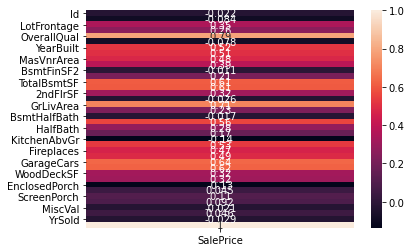

In [7]:
corrMatrix = data_train.corr()
sale_price_corr = corrMatrix[['SalePrice']]
sn.heatmap(sale_price_corr, annot=True)
plt.show()

In [8]:
print(sale_price_corr)

               SalePrice
Id             -0.021917
MSSubClass     -0.084284
LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtFinSF2     -0.011378
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
LowQualFinSF   -0.025606
GrLivArea       0.708624
BsmtFullBath    0.227122
BsmtHalfBath   -0.016844
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
EnclosedPorch  -0.128578
3SsnPorch       0.044584
ScreenPorch     0.111447
PoolArea        0.092404
MiscVal        -0.021190
MoSold          0.046432
YrSold         -0.028923
SalePrice       1.000000


## Feature selection and preprocessing 

In [9]:
columns1 = ['MSSubClass', 'LotFrontage', 'LotArea','OverallQual','OverallCond', 'YearBuilt', 'MasVnrArea',
            'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageArea', 'PoolArea', 'GrLivArea', 'FullBath', 'YearRemodAdd',
           '1stFlrSF']
features_train = data_train[columns1]

features_train = features_train.fillna(value = 0)

labels_train = data_train['SalePrice']

features_test = data_test[columns1]
features_test = features_test.fillna(value = 0)

In [10]:
print(labels_train)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [11]:
std_scaler = StandardScaler()
scaled_features_train = pd.DataFrame(std_scaler.fit_transform(features_train), columns = columns1)
print(scaled_features_train)

scaled_features_test = pd.DataFrame(std_scaler.transform(features_test), columns = columns1)
print(scaled_features_test)

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.073375     0.212877 -0.207142     0.651479    -0.517200   1.050994   
1      -0.872563     0.645747 -0.091886    -0.071836     2.179628   0.156734   
2       0.073375     0.299451  0.073480     0.651479    -0.517200   0.984752   
3       0.309859     0.068587 -0.096897     0.651479    -0.517200  -1.863632   
4       0.073375     0.761179  0.375148     1.374795    -0.517200   0.951632   
...          ...          ...       ...          ...          ...        ...   
1455    0.073375     0.126303 -0.260560    -0.071836    -0.517200   0.918511   
1456   -0.872563     0.790037  0.266407    -0.071836     0.381743   0.222975   
1457    0.309859     0.241735 -0.147810     0.651479     3.078570  -1.002492   
1458   -0.872563     0.299451 -0.080160    -0.795151     0.381743  -0.704406   
1459   -0.872563     0.501457 -0.058112    -0.795151     0.381743  -0.207594   

      MasVnrArea  TotalBsmtSF  TotRmsAb

In [12]:
training_set, val_set, training_labels, val_labels = train_test_split(scaled_features_train, labels_train, test_size = 0.2, random_state=42)

## Model creation and fitting 

### Linear Regressor 

Linear regressors fit a linear model with n features and n+1 coefficients by minimising the Mean Squared Error.

In [29]:
linear_regressor = LinearRegression()
linear_regressor.fit(training_set, training_labels)
val_predictions = linear_regressor.predict(val_set)
print("The R^2 score on training set is ", linear_regressor.score(training_set,training_labels))
print("The R^2 score on the val set it ", linear_regressor.score(val_set, val_labels))
print("The MAE is ", sklearn.metrics.mean_absolute_error(val_labels, val_predictions))

The R^2 score on training set is  0.7810766672620286
The R^2 score on the val set it  0.8132435583978147
The MAE is  23081.03125558148


In [31]:
mae_reg = sklearn.metrics.mean_absolute_error(val_labels, val_predictions)
val_mean = val_labels.mean()
ratio_m_m = mae_reg/val_mean
print("The ratio of MAE to the mean is:", ratio_m_m)

The ratio of MAE to the mean is: 0.1290598052157871


So the R^2 score is reasonably good (> 0.75) on the unseen data and the Mean Absolute Error is about 1/10th of the mean value of the test labels.

Below is the set of coefficients derived by the Linear Regressor model.

In [26]:
print(list(zip(linear_regressor.coef_, columns1)))

[(-6455.19788339362, 'MSSubClass'), (-1358.1829167489996, 'LotFrontage'), (5823.0426225278125, 'LotArea'), (27637.407340946815, 'OverallQual'), (4756.3525479273285, 'OverallCond'), (11822.79036783031, 'YearBuilt'), (4595.2048571262785, 'MasVnrArea'), (4516.2338747333915, 'TotalBsmtSF'), (965.4356262782662, 'TotRmsAbvGrd'), (7974.767519201711, 'GarageArea'), (-804.1627219694349, 'PoolArea'), (25102.228109046617, 'GrLivArea'), (-1569.694079224809, 'FullBath'), (5428.917218957139, 'YearRemodAdd'), (2837.7384142333667, '1stFlrSF')]


### Neural Network 

In [14]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (15,)))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(14, activation='relu'))
model.add(tf.keras.layers.Dense(13, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                195       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 14        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = 'adam', metrics = ['mse','mae'])

In [16]:
history = model.fit(training_set, training_labels, epochs = 750, batch_size = 256, validation_data = (val_set, val_labels))

Epoch 1/750
5/5 [==============================] - 0s 57ms/step - loss: 38885556224.0000 - mse: 38885556224.0000 - mae: 181441.5000 - val_loss: 39653933056.0000 - val_mse: 39653933056.0000 - val_mae: 178839.6875
Epoch 2/750
5/5 [==============================] - 0s 6ms/step - loss: 38885507072.0000 - mse: 38885507072.0000 - mae: 181441.3750 - val_loss: 39653875712.0000 - val_mse: 39653875712.0000 - val_mae: 178839.5312
Epoch 3/750
5/5 [==============================] - 0s 6ms/step - loss: 38885445632.0000 - mse: 38885445632.0000 - mae: 181441.2344 - val_loss: 39653810176.0000 - val_mse: 39653810176.0000 - val_mae: 178839.3906
Epoch 4/750
5/5 [==============================] - 0s 8ms/step - loss: 38885384192.0000 - mse: 38885384192.0000 - mae: 181441.0781 - val_loss: 39653752832.0000 - val_mse: 39653752832.0000 - val_mae: 178839.2344
Epoch 5/750
5/5 [==============================] - 0s 5ms/step - loss: 38885314560.0000 - mse: 38885314560.0000 - mae: 181440.9375 - val_loss: 39653679104.

Epoch 40/750
5/5 [==============================] - 0s 6ms/step - loss: 38842798080.0000 - mse: 38842798080.0000 - mae: 181354.9219 - val_loss: 39606427648.0000 - val_mse: 39606427648.0000 - val_mae: 178748.9375
Epoch 41/750
5/5 [==============================] - 0s 6ms/step - loss: 38837530624.0000 - mse: 38837530624.0000 - mae: 181344.5000 - val_loss: 39600676864.0000 - val_mse: 39600676864.0000 - val_mae: 178738.2344
Epoch 42/750
5/5 [==============================] - 0s 6ms/step - loss: 38831779840.0000 - mse: 38831779840.0000 - mae: 181333.0781 - val_loss: 39594377216.0000 - val_mse: 39594377216.0000 - val_mae: 178726.4688
Epoch 43/750
5/5 [==============================] - 0s 7ms/step - loss: 38825463808.0000 - mse: 38825463808.0000 - mae: 181320.6094 - val_loss: 39587504128.0000 - val_mse: 39587504128.0000 - val_mae: 178713.6250
Epoch 44/750
5/5 [==============================] - 0s 6ms/step - loss: 38818742272.0000 - mse: 38818742272.0000 - mae: 181307.0625 - val_loss: 39579959

Epoch 79/750
5/5 [==============================] - 0s 5ms/step - loss: 37838331904.0000 - mse: 37838331904.0000 - mae: 179349.2656 - val_loss: 38526742528.0000 - val_mse: 38526742528.0000 - val_mae: 176721.8281
Epoch 80/750
5/5 [==============================] - 0s 6ms/step - loss: 37777092608.0000 - mse: 37777092608.0000 - mae: 179226.0156 - val_loss: 38462545920.0000 - val_mse: 38462545920.0000 - val_mae: 176600.3750
Epoch 81/750
5/5 [==============================] - 0s 5ms/step - loss: 37715996672.0000 - mse: 37715996672.0000 - mae: 179102.4375 - val_loss: 38395162624.0000 - val_mse: 38395162624.0000 - val_mae: 176472.9062
Epoch 82/750
5/5 [==============================] - 0s 5ms/step - loss: 37648871424.0000 - mse: 37648871424.0000 - mae: 178967.2500 - val_loss: 38326411264.0000 - val_mse: 38326411264.0000 - val_mae: 176342.4844
Epoch 83/750
5/5 [==============================] - 0s 6ms/step - loss: 37581795328.0000 - mse: 37581795328.0000 - mae: 178832.2500 - val_loss: 38254501

5/5 [==============================] - 0s 6ms/step - loss: 33508456448.0000 - mse: 33508456448.0000 - mae: 170238.0156 - val_loss: 33934587904.0000 - val_mse: 33934587904.0000 - val_mae: 167676.7188
Epoch 118/750
5/5 [==============================] - 0s 5ms/step - loss: 33333139456.0000 - mse: 33333139456.0000 - mae: 169857.3906 - val_loss: 33745358848.0000 - val_mse: 33745358848.0000 - val_mae: 167286.5625
Epoch 119/750
5/5 [==============================] - 0s 6ms/step - loss: 33155391488.0000 - mse: 33155391488.0000 - mae: 169467.3906 - val_loss: 33550948352.0000 - val_mse: 33550948352.0000 - val_mae: 166884.4844
Epoch 120/750
5/5 [==============================] - 0s 6ms/step - loss: 32965328896.0000 - mse: 32965328896.0000 - mae: 169059.1562 - val_loss: 33357422592.0000 - val_mse: 33357422592.0000 - val_mae: 166481.7344
Epoch 121/750
5/5 [==============================] - 0s 6ms/step - loss: 32778919936.0000 - mse: 32778919936.0000 - mae: 168653.9531 - val_loss: 33159624704.0000 

5/5 [==============================] - 0s 7ms/step - loss: 24898560000.0000 - mse: 24898560000.0000 - mae: 149392.8750 - val_loss: 24750338048.0000 - val_mse: 24750338048.0000 - val_mae: 146465.9531
Epoch 156/750
5/5 [==============================] - 0s 7ms/step - loss: 24645754880.0000 - mse: 24645754880.0000 - mae: 148679.7500 - val_loss: 24466710528.0000 - val_mse: 24466710528.0000 - val_mae: 145717.7031
Epoch 157/750
5/5 [==============================] - 0s 7ms/step - loss: 24384094208.0000 - mse: 24384094208.0000 - mae: 147940.3125 - val_loss: 24183758848.0000 - val_mse: 24183758848.0000 - val_mae: 144963.5625
Epoch 158/750
5/5 [==============================] - 0s 6ms/step - loss: 24122378240.0000 - mse: 24122378240.0000 - mae: 147199.8281 - val_loss: 23902113792.0000 - val_mse: 23902113792.0000 - val_mae: 144205.2812
Epoch 159/750
5/5 [==============================] - 0s 7ms/step - loss: 23861872640.0000 - mse: 23861872640.0000 - mae: 146449.0312 - val_loss: 23621644288.0000 

5/5 [==============================] - 0s 6ms/step - loss: 16117809152.0000 - mse: 16117809152.0000 - mae: 118527.2344 - val_loss: 15078818816.0000 - val_mse: 15078818816.0000 - val_mae: 115070.9062
Epoch 194/750
5/5 [==============================] - 0s 6ms/step - loss: 15941698560.0000 - mse: 15941698560.0000 - mae: 117694.1953 - val_loss: 14879815680.0000 - val_mse: 14879815680.0000 - val_mae: 114249.9375
Epoch 195/750
5/5 [==============================] - 0s 6ms/step - loss: 15765447680.0000 - mse: 15765447680.0000 - mae: 116885.2344 - val_loss: 14685804544.0000 - val_mse: 14685804544.0000 - val_mae: 113448.0156
Epoch 196/750
5/5 [==============================] - 0s 6ms/step - loss: 15602720768.0000 - mse: 15602720768.0000 - mae: 116055.7266 - val_loss: 14490937344.0000 - val_mse: 14490937344.0000 - val_mae: 112637.1875
Epoch 197/750
5/5 [==============================] - 0s 6ms/step - loss: 15435153408.0000 - mse: 15435153408.0000 - mae: 115232.0547 - val_loss: 14299631616.0000 

Epoch 232/750
5/5 [==============================] - 0s 9ms/step - loss: 11694494720.0000 - mse: 11694494720.0000 - mae: 92842.1797 - val_loss: 9969307648.0000 - val_mse: 9969307648.0000 - val_mae: 89614.8359
Epoch 233/750
5/5 [==============================] - 0s 7ms/step - loss: 11626276864.0000 - mse: 11626276864.0000 - mae: 92411.0156 - val_loss: 9895165952.0000 - val_mse: 9895165952.0000 - val_mae: 89149.5703
Epoch 234/750
5/5 [==============================] - 0s 7ms/step - loss: 11563325440.0000 - mse: 11563325440.0000 - mae: 91973.5469 - val_loss: 9820713984.0000 - val_mse: 9820713984.0000 - val_mae: 88673.7188
Epoch 235/750
5/5 [==============================] - 0s 7ms/step - loss: 11500851200.0000 - mse: 11500851200.0000 - mae: 91563.0859 - val_loss: 9749531648.0000 - val_mse: 9749531648.0000 - val_mae: 88216.0703
Epoch 236/750
5/5 [==============================] - 0s 7ms/step - loss: 11442870272.0000 - mse: 11442870272.0000 - mae: 91156.2812 - val_loss: 9678223360.0000 - va

5/5 [==============================] - 0s 6ms/step - loss: 9788667904.0000 - mse: 9788667904.0000 - mae: 80693.2656 - val_loss: 7898496512.0000 - val_mse: 7898496512.0000 - val_mae: 76010.3438
Epoch 272/750
5/5 [==============================] - 0s 7ms/step - loss: 9749256192.0000 - mse: 9749256192.0000 - mae: 80449.8750 - val_loss: 7859345408.0000 - val_mse: 7859345408.0000 - val_mae: 75764.4844
Epoch 273/750
5/5 [==============================] - 0s 6ms/step - loss: 9711176704.0000 - mse: 9711176704.0000 - mae: 80216.7656 - val_loss: 7820128256.0000 - val_mse: 7820128256.0000 - val_mae: 75524.8594
Epoch 274/750
5/5 [==============================] - 0s 7ms/step - loss: 9672330240.0000 - mse: 9672330240.0000 - mae: 79978.7500 - val_loss: 7782901760.0000 - val_mse: 7782901760.0000 - val_mae: 75299.9062
Epoch 275/750
5/5 [==============================] - 0s 8ms/step - loss: 9635893248.0000 - mse: 9635893248.0000 - mae: 79737.7969 - val_loss: 7742960128.0000 - val_mse: 7742960128.0000 -

Epoch 311/750
5/5 [==============================] - 0s 7ms/step - loss: 8398973440.0000 - mse: 8398973440.0000 - mae: 72402.6641 - val_loss: 6592460800.0000 - val_mse: 6592460800.0000 - val_mae: 67983.3906
Epoch 312/750
5/5 [==============================] - 0s 7ms/step - loss: 8368280064.0000 - mse: 8368280064.0000 - mae: 72216.2109 - val_loss: 6563021312.0000 - val_mse: 6563021312.0000 - val_mae: 67793.9141
Epoch 313/750
5/5 [==============================] - 0s 6ms/step - loss: 8338127360.0000 - mse: 8338127360.0000 - mae: 72028.9141 - val_loss: 6534137856.0000 - val_mse: 6534137856.0000 - val_mae: 67608.0703
Epoch 314/750
5/5 [==============================] - 0s 6ms/step - loss: 8308656128.0000 - mse: 8308656128.0000 - mae: 71850.6953 - val_loss: 6508677120.0000 - val_mse: 6508677120.0000 - val_mae: 67444.8047
Epoch 315/750
5/5 [==============================] - 0s 6ms/step - loss: 8277380608.0000 - mse: 8277380608.0000 - mae: 71682.3828 - val_loss: 6482840576.0000 - val_mse: 648

5/5 [==============================] - 0s 7ms/step - loss: 7314950144.0000 - mse: 7314950144.0000 - mae: 66060.5625 - val_loss: 5641734656.0000 - val_mse: 5641734656.0000 - val_mae: 61698.8711
Epoch 351/750
5/5 [==============================] - 0s 6ms/step - loss: 7290584576.0000 - mse: 7290584576.0000 - mae: 65904.9219 - val_loss: 5620028928.0000 - val_mse: 5620028928.0000 - val_mae: 61543.0625
Epoch 352/750
5/5 [==============================] - 0s 6ms/step - loss: 7267579904.0000 - mse: 7267579904.0000 - mae: 65754.7109 - val_loss: 5598457856.0000 - val_mse: 5598457856.0000 - val_mae: 61389.0898
Epoch 353/750
5/5 [==============================] - 0s 6ms/step - loss: 7243202048.0000 - mse: 7243202048.0000 - mae: 65596.7812 - val_loss: 5576361984.0000 - val_mse: 5576361984.0000 - val_mae: 61229.3984
Epoch 354/750
5/5 [==============================] - 0s 6ms/step - loss: 7219418624.0000 - mse: 7219418624.0000 - mae: 65448.2539 - val_loss: 5555433472.0000 - val_mse: 5555433472.0000 -

Epoch 390/750
5/5 [==============================] - 0s 6ms/step - loss: 6461669376.0000 - mse: 6461669376.0000 - mae: 60771.9453 - val_loss: 4937170432.0000 - val_mse: 4937170432.0000 - val_mae: 56650.9570
Epoch 391/750
5/5 [==============================] - 0s 6ms/step - loss: 6440563200.0000 - mse: 6440563200.0000 - mae: 60658.0156 - val_loss: 4921992192.0000 - val_mse: 4921992192.0000 - val_mae: 56541.9805
Epoch 392/750
5/5 [==============================] - 0s 6ms/step - loss: 6422491136.0000 - mse: 6422491136.0000 - mae: 60541.2344 - val_loss: 4907904000.0000 - val_mse: 4907904000.0000 - val_mae: 56444.0156
Epoch 393/750
5/5 [==============================] - 0s 6ms/step - loss: 6405346304.0000 - mse: 6405346304.0000 - mae: 60430.8164 - val_loss: 4893991424.0000 - val_mse: 4893991424.0000 - val_mae: 56347.2344
Epoch 394/750
5/5 [==============================] - 0s 5ms/step - loss: 6386577408.0000 - mse: 6386577408.0000 - mae: 60316.3281 - val_loss: 4878826496.0000 - val_mse: 487

5/5 [==============================] - 0s 6ms/step - loss: 5833929216.0000 - mse: 5833929216.0000 - mae: 56864.9688 - val_loss: 4457306112.0000 - val_mse: 4457306112.0000 - val_mae: 53277.7656
Epoch 430/750
5/5 [==============================] - 0s 7ms/step - loss: 5821484544.0000 - mse: 5821484544.0000 - mae: 56786.3320 - val_loss: 4448647680.0000 - val_mse: 4448647680.0000 - val_mae: 53218.0117
Epoch 431/750
5/5 [==============================] - 0s 6ms/step - loss: 5806102016.0000 - mse: 5806102016.0000 - mae: 56702.1016 - val_loss: 4439001088.0000 - val_mse: 4439001088.0000 - val_mae: 53146.9727
Epoch 432/750
5/5 [==============================] - 0s 6ms/step - loss: 5791961600.0000 - mse: 5791961600.0000 - mae: 56612.2617 - val_loss: 4428087296.0000 - val_mse: 4428087296.0000 - val_mae: 53061.7266
Epoch 433/750
5/5 [==============================] - 0s 8ms/step - loss: 5778507776.0000 - mse: 5778507776.0000 - mae: 56530.5898 - val_loss: 4419366912.0000 - val_mse: 4419366912.0000 -

Epoch 469/750
5/5 [==============================] - 0s 5ms/step - loss: 5328993792.0000 - mse: 5328993792.0000 - mae: 53740.6289 - val_loss: 4112481792.0000 - val_mse: 4112481792.0000 - val_mae: 50598.4375
Epoch 470/750
5/5 [==============================] - 0s 7ms/step - loss: 5318060544.0000 - mse: 5318060544.0000 - mae: 53674.6523 - val_loss: 4106080512.0000 - val_mse: 4106080512.0000 - val_mae: 50552.2266
Epoch 471/750
5/5 [==============================] - 0s 6ms/step - loss: 5306496512.0000 - mse: 5306496512.0000 - mae: 53611.1875 - val_loss: 4099064832.0000 - val_mse: 4099064832.0000 - val_mae: 50499.8086
Epoch 472/750
5/5 [==============================] - 0s 7ms/step - loss: 5295455232.0000 - mse: 5295455232.0000 - mae: 53549.9688 - val_loss: 4092136192.0000 - val_mse: 4092136192.0000 - val_mae: 50448.3281
Epoch 473/750
5/5 [==============================] - 0s 7ms/step - loss: 5283295232.0000 - mse: 5283295232.0000 - mae: 53480.1562 - val_loss: 4084540160.0000 - val_mse: 408

5/5 [==============================] - 0s 6ms/step - loss: 4910248960.0000 - mse: 4910248960.0000 - mae: 51254.5820 - val_loss: 3841955072.0000 - val_mse: 3841955072.0000 - val_mae: 48465.8320
Epoch 509/750
5/5 [==============================] - 0s 7ms/step - loss: 4899209728.0000 - mse: 4899209728.0000 - mae: 51191.7695 - val_loss: 3835027968.0000 - val_mse: 3835027968.0000 - val_mae: 48407.8945
Epoch 510/750
5/5 [==============================] - 0s 6ms/step - loss: 4888906752.0000 - mse: 4888906752.0000 - mae: 51125.5391 - val_loss: 3827270144.0000 - val_mse: 3827270144.0000 - val_mae: 48338.9492
Epoch 511/750
5/5 [==============================] - 0s 7ms/step - loss: 4878729728.0000 - mse: 4878729728.0000 - mae: 51056.9375 - val_loss: 3820203008.0000 - val_mse: 3820203008.0000 - val_mae: 48279.9297
Epoch 512/750
5/5 [==============================] - 0s 6ms/step - loss: 4867650560.0000 - mse: 4867650560.0000 - mae: 50997.1797 - val_loss: 3814857728.0000 - val_mse: 3814857728.0000 -

5/5 [==============================] - 0s 6ms/step - loss: 4527255552.0000 - mse: 4527255552.0000 - mae: 48892.9297 - val_loss: 3589852416.0000 - val_mse: 3589852416.0000 - val_mae: 46439.8359
Epoch 548/750
5/5 [==============================] - 0s 7ms/step - loss: 4517783040.0000 - mse: 4517783040.0000 - mae: 48839.2070 - val_loss: 3584075008.0000 - val_mse: 3584075008.0000 - val_mae: 46399.4102
Epoch 549/750
5/5 [==============================] - 0s 8ms/step - loss: 4508593152.0000 - mse: 4508593152.0000 - mae: 48781.9844 - val_loss: 3577959424.0000 - val_mse: 3577959424.0000 - val_mae: 46354.8281
Epoch 550/750
5/5 [==============================] - 0s 7ms/step - loss: 4499408384.0000 - mse: 4499408384.0000 - mae: 48727.1797 - val_loss: 3572631808.0000 - val_mse: 3572631808.0000 - val_mae: 46319.5859
Epoch 551/750
5/5 [==============================] - 0s 7ms/step - loss: 4490345984.0000 - mse: 4490345984.0000 - mae: 48672.9102 - val_loss: 3567975424.0000 - val_mse: 3567975424.0000 -

Epoch 587/750
5/5 [==============================] - 0s 10ms/step - loss: 4154008320.0000 - mse: 4154008320.0000 - mae: 46658.0195 - val_loss: 3355400192.0000 - val_mse: 3355400192.0000 - val_mae: 44794.2930
Epoch 588/750
5/5 [==============================] - 0s 10ms/step - loss: 4145696512.0000 - mse: 4145696512.0000 - mae: 46607.1172 - val_loss: 3350800896.0000 - val_mse: 3350800896.0000 - val_mae: 44765.6523
Epoch 589/750
5/5 [==============================] - 0s 9ms/step - loss: 4136391168.0000 - mse: 4136391168.0000 - mae: 46555.6562 - val_loss: 3345976320.0000 - val_mse: 3345976320.0000 - val_mae: 44733.6094
Epoch 590/750
5/5 [==============================] - 0s 8ms/step - loss: 4126779904.0000 - mse: 4126779904.0000 - mae: 46505.9883 - val_loss: 3340381184.0000 - val_mse: 3340381184.0000 - val_mae: 44693.7422
Epoch 591/750
5/5 [==============================] - 0s 8ms/step - loss: 4117813504.0000 - mse: 4117813504.0000 - mae: 46451.2109 - val_loss: 3334590976.0000 - val_mse: 3

5/5 [==============================] - 0s 7ms/step - loss: 3800980736.0000 - mse: 3800980736.0000 - mae: 44463.7930 - val_loss: 3130965760.0000 - val_mse: 3130965760.0000 - val_mae: 43146.3711
Epoch 627/750
5/5 [==============================] - 0s 7ms/step - loss: 3792213248.0000 - mse: 3792213248.0000 - mae: 44410.9258 - val_loss: 3126027776.0000 - val_mse: 3126027776.0000 - val_mae: 43111.4297
Epoch 628/750
5/5 [==============================] - 0s 7ms/step - loss: 3783366400.0000 - mse: 3783366400.0000 - mae: 44355.1016 - val_loss: 3120323072.0000 - val_mse: 3120323072.0000 - val_mae: 43068.5547
Epoch 629/750
5/5 [==============================] - 0s 7ms/step - loss: 3774865152.0000 - mse: 3774865152.0000 - mae: 44296.9492 - val_loss: 3113612288.0000 - val_mse: 3113612288.0000 - val_mae: 43015.0195
Epoch 630/750
5/5 [==============================] - 0s 7ms/step - loss: 3765549056.0000 - mse: 3765549056.0000 - mae: 44238.9102 - val_loss: 3108913152.0000 - val_mse: 3108913152.0000 -

Epoch 666/750
5/5 [==============================] - 0s 7ms/step - loss: 3460079872.0000 - mse: 3460079872.0000 - mae: 42202.3633 - val_loss: 2909350144.0000 - val_mse: 2909350144.0000 - val_mae: 41485.1211
Epoch 667/750
5/5 [==============================] - 0s 7ms/step - loss: 3451713024.0000 - mse: 3451713024.0000 - mae: 42140.5664 - val_loss: 2903197184.0000 - val_mse: 2903197184.0000 - val_mae: 41437.7500
Epoch 668/750
5/5 [==============================] - 0s 7ms/step - loss: 3444169216.0000 - mse: 3444169216.0000 - mae: 42081.8203 - val_loss: 2897568512.0000 - val_mse: 2897568512.0000 - val_mae: 41393.6719
Epoch 669/750
5/5 [==============================] - 0s 8ms/step - loss: 3435424256.0000 - mse: 3435424256.0000 - mae: 42021.9180 - val_loss: 2890924032.0000 - val_mse: 2890924032.0000 - val_mae: 41342.8555
Epoch 670/750
5/5 [==============================] - 0s 8ms/step - loss: 3427006208.0000 - mse: 3427006208.0000 - mae: 41959.4141 - val_loss: 2884569344.0000 - val_mse: 288

5/5 [==============================] - 0s 6ms/step - loss: 3142804224.0000 - mse: 3142804224.0000 - mae: 39930.3750 - val_loss: 2702374144.0000 - val_mse: 2702374144.0000 - val_mae: 39862.1172
Epoch 706/750
5/5 [==============================] - 0s 5ms/step - loss: 3135913728.0000 - mse: 3135913728.0000 - mae: 39876.6367 - val_loss: 2698841600.0000 - val_mse: 2698841600.0000 - val_mae: 39832.4375
Epoch 707/750
5/5 [==============================] - 0s 5ms/step - loss: 3127075840.0000 - mse: 3127075840.0000 - mae: 39819.2930 - val_loss: 2693010432.0000 - val_mse: 2693010432.0000 - val_mae: 39787.0547
Epoch 708/750
5/5 [==============================] - 0s 7ms/step - loss: 3119913216.0000 - mse: 3119913216.0000 - mae: 39762.0859 - val_loss: 2688685824.0000 - val_mse: 2688685824.0000 - val_mae: 39750.9961
Epoch 709/750
5/5 [==============================] - 0s 6ms/step - loss: 3111863808.0000 - mse: 3111863808.0000 - mae: 39705.7578 - val_loss: 2683554560.0000 - val_mse: 2683554560.0000 -

Epoch 745/750
5/5 [==============================] - 0s 5ms/step - loss: 2836794112.0000 - mse: 2836794112.0000 - mae: 37617.4805 - val_loss: 2500835840.0000 - val_mse: 2500835840.0000 - val_mae: 38160.7578
Epoch 746/750
5/5 [==============================] - 0s 5ms/step - loss: 2829566720.0000 - mse: 2829566720.0000 - mae: 37560.8203 - val_loss: 2494986496.0000 - val_mse: 2494986496.0000 - val_mae: 38112.0703
Epoch 747/750
5/5 [==============================] - 0s 5ms/step - loss: 2822086656.0000 - mse: 2822086656.0000 - mae: 37503.6445 - val_loss: 2491412992.0000 - val_mse: 2491412992.0000 - val_mae: 38079.8438
Epoch 748/750
5/5 [==============================] - 0s 5ms/step - loss: 2814521600.0000 - mse: 2814521600.0000 - mae: 37447.1367 - val_loss: 2486755328.0000 - val_mse: 2486755328.0000 - val_mae: 38038.7188
Epoch 749/750
5/5 [==============================] - 0s 5ms/step - loss: 2807477760.0000 - mse: 2807477760.0000 - mae: 37394.8477 - val_loss: 2481900544.0000 - val_mse: 248

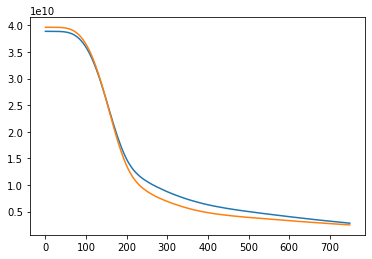

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [24]:
model.evaluate(val_set, val_labels)

10/10 [==============================] - 0s 2ms/step - loss: 2477170432.0000 - mse: 2477170432.0000 - mae: 37955.1094


[2477170432.0, 2477170432.0, 37955.109375]

In [36]:
val_predict = model.predict(val_set)
print("The R^2 on the neural network is:", sk.metrics.r2_score(val_labels, val_predict))

The R^2 on the neural network is: 0.6770450111872562


In [44]:
nn_mae = model.evaluate(val_set, val_labels)[2]
print("The mean absolute error for the neural network is:", nn_mae)
print("The ratio of the MAE to the mean value is:", nn_mae/val_mean)

10/10 [==============================] - 0s 599us/step - loss: 2477170432.0000 - mse: 2477170432.0000 - mae: 37955.1094
The mean absolute error for the neural network is: 37955.109375
The ratio of the MAE to the mean value is: 0.21222964297562916


### Random Forest Regressor 

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor(n_estimators = 200)

In [46]:
rfr.fit(training_set, training_labels)
rfr_predict = rfr.predict(val_set)

In [47]:
print("The MAE is ", sklearn.metrics.mean_absolute_error(val_labels, rfr_predict))
print("The R^2 score on train set is:", rfr.score(training_set, training_labels))
print("The R^2 score on test set is:", rfr.score(val_set, val_labels))

The MAE is  18687.084897260273
The R^2 score on train set is: 0.9743800399015677
The R^2 score on test set is: 0.8700547338612645


In [48]:
ns = []
scores = []
for i in range(100, 300):
    ns.append(i)
    rfr1 = RandomForestRegressor(n_estimators = i)
    rfr1.fit(training_set, training_labels)
    score = rfr1.score(val_set, val_labels)
    scores.append(score)

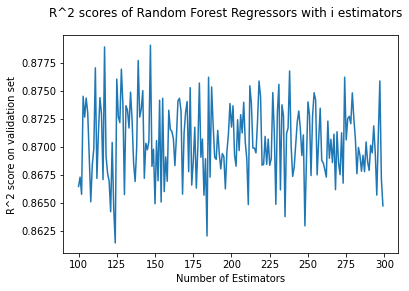

In [50]:
plt.plot(ns, scores)
plt.suptitle("R^2 scores of Random Forest Regressors with i estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("R^2 score on validation set")
plt.show()
plt.close()

# Some conclusions

The random forest regressor performs the best as it has the least MAE and the highest R^2 score. The number of trees used doesn't seem to make a huge difference, so to stop the overfitting, some other parameter should be changed. I will update this once I have found that parameter.

Additionally, the neural network does not perform as well as I'd like. I would have thought this regression would be a relatively simple task although it performs worst even with around 700 parameters. I will keep experimenting.